## 4\. Suppose you want to predict how much a male diner will tip on a Sunday bill of \$40.00. Fit a linear regression model to the tips data to answer this question. (Hint: You will need to convert categorical variables to quantitative variables. Refer to Chapter 3.)

## Load data

In [23]:
import pandas as pd

df = pd.read_csv("tips.csv")
df

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4
...,...,...,...,...,...,...,...,...
239,240,29.03,5.92,M,No,Sat,Night,3
240,241,27.18,2.00,F,Yes,Sat,Night,2
241,242,22.67,2.00,M,Yes,Sat,Night,2
242,243,17.82,1.75,M,No,Sat,Night,2


# Switch sex and day to quantitative variables


In [24]:
df = df[['totbill', 'tip', 'sex', 'day']]
df

,totbill,tip,sex,day
0,16.99,1.01,F,Sun
1,10.34,1.66,M,Sun
2,21.01,3.50,M,Sun
3,23.68,3.31,M,Sun
4,24.59,3.61,F,Sun
...,...,...,...,...
239,29.03,5.92,M,Sat
240,27.18,2.00,F,Sat
241,22.67,2.00,M,Sat
242,17.82,1.75,M,Sat


In [25]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
X_train = df[["totbill", "sex","day"]] # need 2D array for sklearn
y_train = df["tip"] #we are trying to predict tip

ct = make_column_transformer(
    (StandardScaler(), ["totbill"]),
    (OneHotEncoder(), ["sex", "day"]),
    remainder="drop"  # all other columns in X will be dropped.
)
ct


ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['totbill']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['sex', 'day'])])

## Create a pipeline for a K nearest neighbor model with 10 neighbors

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

pipeline = make_pipeline(
    ct,
    # KNeighborsRegressor(n_neighbors=10)
    LinearRegression()
)

pipeline.fit(X=X_train, 
             y=y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['totbill']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['sex', 'day'])])),
                ('linearregression', LinearRegression())])

In [29]:
x_test = pd.Series()
x_test["totbill"] = 40
x_test["sex"] = "M"
x_test["day"] = "Sun"


pipeline.predict(X=pd.DataFrame([x_test]))

<ipython-input-29-31b0052fbdb7>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_test = pd.Series()


array([5.19600209])

# The expected tip is  <span style="color:green">5.19</span> from our models prediction

## 5\. Fit a linear regression model, with no intercept, that predicts the tip from the total bill. That is, we want our predictions to be of the form 
$$ \widehat{\text{tip}} = c \cdot (\text{total bill}). $$
where $c$ is some coefficient to be learned from the training data. 

(_Hint:_ `LinearRegression()` has a parameter, `fit_intercept=`, which is `True` by default.)
    
Plot the data and the fitted model. In practical terms, what assumption is being made when we fit a model with no intercept? 

In [32]:
X_train = df[["totbill"]] # need 2D array for sklearn
y_train = df["tip"] #we are trying to predict tip

X_train 


model = LinearRegression(fit_intercept=False)

In [34]:
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

<AxesSubplot:xlabel='age'>

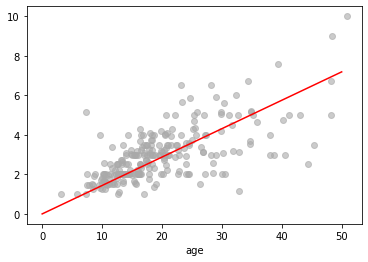

In [47]:
import matplotlib.pyplot as plt
import numpy as np

X_new = pd.DataFrame()
X_new["age"] = np.linspace(0, 50, num=200)
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["age"]
)
    
plt.scatter(x=X_train, y=y_train, c="darkgrey", alpha=.6)
y_new_.plot.line(c="red")

Here, setting fit intercept to false means you get an equation in the form y = mx instead of y = mx+b. This setting assumes the intercept is 0, which makes sense for our dataset since an order worth $0 would receive a tip of $0 